<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Process_KMA_GSICS_RAC_GK2A_NOAA20CrIS_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSICS Product User Platform[For Product Type Re-Analysis (RAC)]
*By Manik Bali, ESSIC/UMD*

We present here a python platform built on Google Colab, aimed to help users use GSICS products. This has python codes that can help you

1. Pick a GSICS product directly from  [GSICS Product Catalog](https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php)
2. Extract variables from GSICS products
3. Plot extracted Variables
4. Apply the correction coefficients to correct biases in monitored instrument and plot them
5. Instantly share your code and data with the GSICS community, its users and friends ( ISCCP, GEO, GCOS, WMO members )

**Features of GSICS User Google Colab Platform**:

Google Colab is a collaborative development environment. Its a Paradigm shift in the manner in which GSICS data and code are being shared. Here we are sharing data with a working instance of the algorithm and a python code.
Members accessing this colab can contribute their modules to the Colab notebook as well as pick up code from here (under the GSICS GPL)

Currently accessible by most of the GSICS member agencies. It gives a python run time environment directly in your browser. The platform is shareable, comes free and has cloud computing resources inbuilt into it.
GSICS members can make contributions of code directly into the colab library.

**How to plot variables in a GSICS products**

The first part of the code reads in GSICS data( NetCDF) that resides on the GSICS product Catalog and plots the bias on the Stadard Scene.
One can plot any variable extracted from the GSICS Product. Here we plot the Standard Scente Temp bias time series.

**How to use Correction Coefficients to correct biases**

The second part of the code uses the GSICS Correction coefficients that can be used to correct the operationally produced radiance in the GEO
Meteosat/SEVIRI L1.5 data, LGEO, so its calibration is consistent with that of the LEO reference instrument, Metop/IASI, LLEO.

The steps uses are the following

The operational radiance, LGEO, is calculated from the L1.5 counts as:

Equation 1:


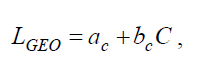


where C is the pixel count, ac and bc are the operational offset and slope calibration
coefficients, respectively, referred to as Cal_Offset and Cal_Slope in the L1.5 files [AD-3].

The GSICS Corrected radiance is then given by Equation 2, which may be re-written as


Equation 2 [ Corrected Radiance can be written as]:

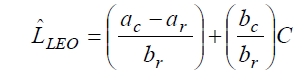

where ar  and br  are the coefficients of the GSICS Correction given in the netCDF file as the
variables offset and slope, respectively.

This is equivalent to  changing the space count  and calibration coefficient in Equation 4 to
ag=(ac- ar)/br and bg= (bc/br), respectively.


Modus Operandi
The code reads in the correction coefficients and applies these on a synthetic GEO measurement to get an estimate of the impact of using GSICS Correction Coefficients


**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)


**How to use this Notebook for the product you are interested in**

This notebook is for Product Type Re-Analysis Correction. For Product Type Near Real Time Correction click [here](https://colab.research.google.com/drive/18SjLpebRKPdEBT_eYuZrEGTQNo82gpn4)
1.   Make a copy of this notebook Click File-> Save a Copy in Drive
2.   On the GSICS Product Catalog https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php select the data set you are interested. Data->Click on Data you are interested in if there are multiple files, click on the one you are interested in, it would lead you to a page as below and then save the HTTPServer link and give the url this value of the hyperlink. See image below
3.  Under Runtime press Run All



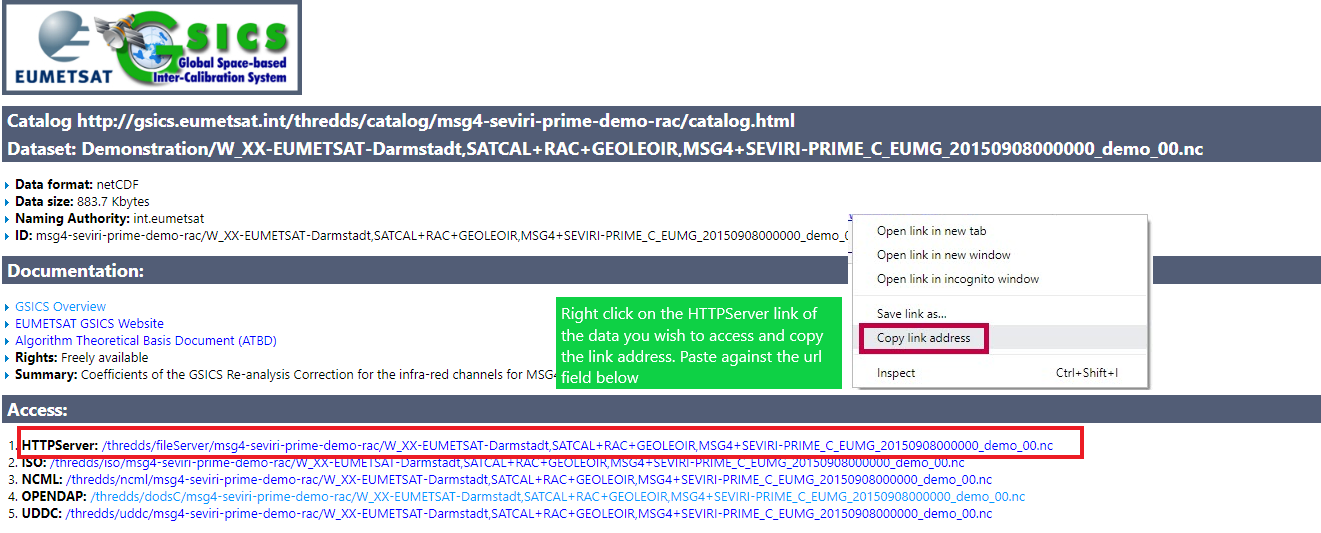


In [ ]:
#url="http://gsics.eumetsat.int/thredds/fileServer/msg2-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG2+SEVIRI-MetOpB+IASI_C_EUMG_20130110000000_01.nc"
#url="http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-prime-demo-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG1+SEVIRI-PRIME_C_EUMG_20080601000000_demo_00.nc"
#url="http://gsics.eumetsat.int/thredds/fileServer/himawari8-ahi-metopa-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari8+AHI-MetopA+IASI_C_RJTD_20150220000000_demo_01.nc"
#url="http://gsics.eumetsat.int/thredds/fileSerhttps://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-noaa21-cris-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-NOAA21+CRIS_C_RKSL_20190725000000_demo_01.ncver/msg4-seviri-metopb-iasi-preop-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20201005000000_preop_01.nc" # URL extract from above
#url="http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-metopb-iasi-oper-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-MetOpB+IASI_C_EUMG_20150601000000_01.nc"
url="https://gsics.eumetsat.int/thredds/fileServer/gk2a-ami-noaa20-cris-demo-rac/W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-NOAA20+CRIS_C_RKSL_20190725000000_demo_01.nc"

In [ ]:
!pip install netCDF4
!pip install julian
!pip install cftime

import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import datetime
import urllib.request
from datetime import date
import julian
import matplotlib
from cftime import num2pydate
from netCDF4 import num2date
import pandas as pd
from datetime import datetime
import urllib.request
import os.path


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for julian: filename=julian-0.14-py3-none-any.whl size=2613 sha256=adc9829f23625aed18147ec15df0ddda3def0d9bacc50de6f5b38f5808c95d94
  Stored in directory: /root/.cache/pip/wheels/03/10/8c/d2e9275374f869cd79f9f19f251876f97272f0c4ce60e3a053
Successfully built julian


In [ ]:
#url="http://gsics.eumetsat.int/thredds/fileServer/msg4-seviri-prime-demo-rac/W_XX-EUMETSAT-Darmstadt,SATCAL+RAC+GEOLEOIR,MSG4+SEVIRI-PRIME_C_EUMG_20150908000000_demo_00.nc"
#url="http://gsics.eumetsat.int/thredds/fileServer/himawari9-ahi-metopb-iasi-demo-rac/W_JP-JMA-MSC,SATCAL+RAC+GEOLEOIR,Himawari9+AHI-MetopB+IASI_C_RJTD_20170128000000_demo_01.nc"
url1, nc_file=  os.path.split(url)
urllib.request.urlretrieve(url, nc_file)

('W_KR-KMA-NMSC,SATCAL+RAC+GEOLEOIR,GK2A+AMI-NOAA20+CRIS_C_RKSL_20190725000000_demo_01.nc',
 <http.client.HTTPMessage at 0x7fa058d81e70>)

In [ ]:

# Open the GSICS netCDF file and read variables [ You can add in more]
with nc4.Dataset(nc_file,'r') as ncid:
     std_bias      = ncid.variables['std_scene_tb_bias'][:][:] # Standard Scene TB Bias
     time_array    = ncid.variables['date'][:] #time
     freq_array    = ncid.variables['wnc'][:] #wnc
     std_scene_tb    = ncid.variables['std_scene_tb'][:] # Scene TB
     # delta_slope    = ncid.variables['delta_slope'][:] # Slope
     # delta_offset    = ncid.variables['offset'][:] # Offset
     # reference_name    = ncid.variables['reference_name'][:] # Refname
     alpha             = ncid.variables['alpha'][:] # Alpha
     beta              = ncid.variables['beta'][:] # Beta
     br0              = ncid.variables['slope'][:] # Slope
     ar0              = ncid.variables['offset'][:] # Offset
     time_array =time_array/86400.0

In [ ]:
xnames=list(ncid.variables.keys())
print(xnames)


['wnc', 'alpha', 'beta', 'date', 'channel_name', 'number_of_collocation', 'central_wavelength', 'offset', 'offset_se', 'slope', 'slope_se', 'covariance', 'std_scene_tb', 'std_scene_tb_bias', 'std_scene_tb_bias_se', 'validity_period', 'a1', 'a2', 'a3']


In [ ]:
print(nc4.Dataset(nc_file,'r').variables['covariance'].get_dims())


("<class 'netCDF4.Dimension'>": name = 'date1', size = 1976, "<class 'netCDF4.Dimension'>": name = 'chan', size = 10)


In [ ]:
ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
if "PRIME" in (nc4.Dataset(nc_file,'r').id):
    ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene [PRIME]"
else:
    ttitle="Time series of ["+nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument + "] bias on Standard Scene"
ytitle=nc4.Dataset(nc_file,'r').monitored_instrument + " - " + nc4.Dataset(nc_file,'r').reference_instrument +" in Deg K"

In [ ]:
print(ttitle)

Time series of [GK2A AMI - NOAA20 CrIS] bias on Standard Scene


In [ ]:
#Construct a data frame with observation days in the first column
#However this has missing days and at time repeated days.
dtime_days=pd.DataFrame(time_array.astype(int),columns=list('t'))
std_df = pd.DataFrame(std_bias)
std_df.columns.name = 'standard_scene_bias'

#print(ar.shape,br.shape,time_array.shape)

ar_df=pd.DataFrame(ar0)
ar_df.columns.name = 'offset'

br_df=pd.DataFrame(br0)
br_df.columns.name = 'bias'



std_df.columns=freq_array
df_time_std_bias=[dtime_days,std_df]
df_time_ar=[dtime_days,ar_df]
df_time_br=[dtime_days,br_df]

#df_time_std_bias=[dtime_days,std_df,ar_df,br_df]
df_time_bias=pd.concat(df_time_std_bias,axis=1) # Data Frame with time information added in column
df_time_ar=pd.concat(df_time_ar,axis=1) # Data Frame with time information added in column
df_time_br=pd.concat(df_time_br,axis=1) # Data Frame with time information added in column

#Construct a data time series such that days are evenly placed
#However this has missing days. Fill Nan on these days. Also drop duplicate days if any

print(time_array[0].astype(int),time_array[-1].astype(int))
new_index = pd.Index(np.arange(time_array[0].astype(int), time_array[-1].astype(int) + 1), name="t")
temp=df_time_bias.drop_duplicates(subset=['t'])
ar_temp=df_time_ar.drop_duplicates(subset=['t'])
br_temp=df_time_br.drop_duplicates(subset=['t'])


df_reindex=temp.set_index("t").reindex(new_index)
df_array=df_reindex.to_numpy()

df_reindex_ar=ar_temp.set_index("t").reindex(new_index)
df_array_ar=df_reindex_ar.to_numpy()

df_reindex_br=br_temp.set_index("t").reindex(new_index)
df_array_br=df_reindex_br.to_numpy()

ar=df_array_ar.copy()
br=df_array_br.copy()
cr=df_array_ar/df_array_br




18102 20077


In [ ]:
df_array.shape

(1976, 10)

[ 3.827  6.182  6.937  7.325  8.584  9.616 10.35  11.214 12.336 13.284]
1976


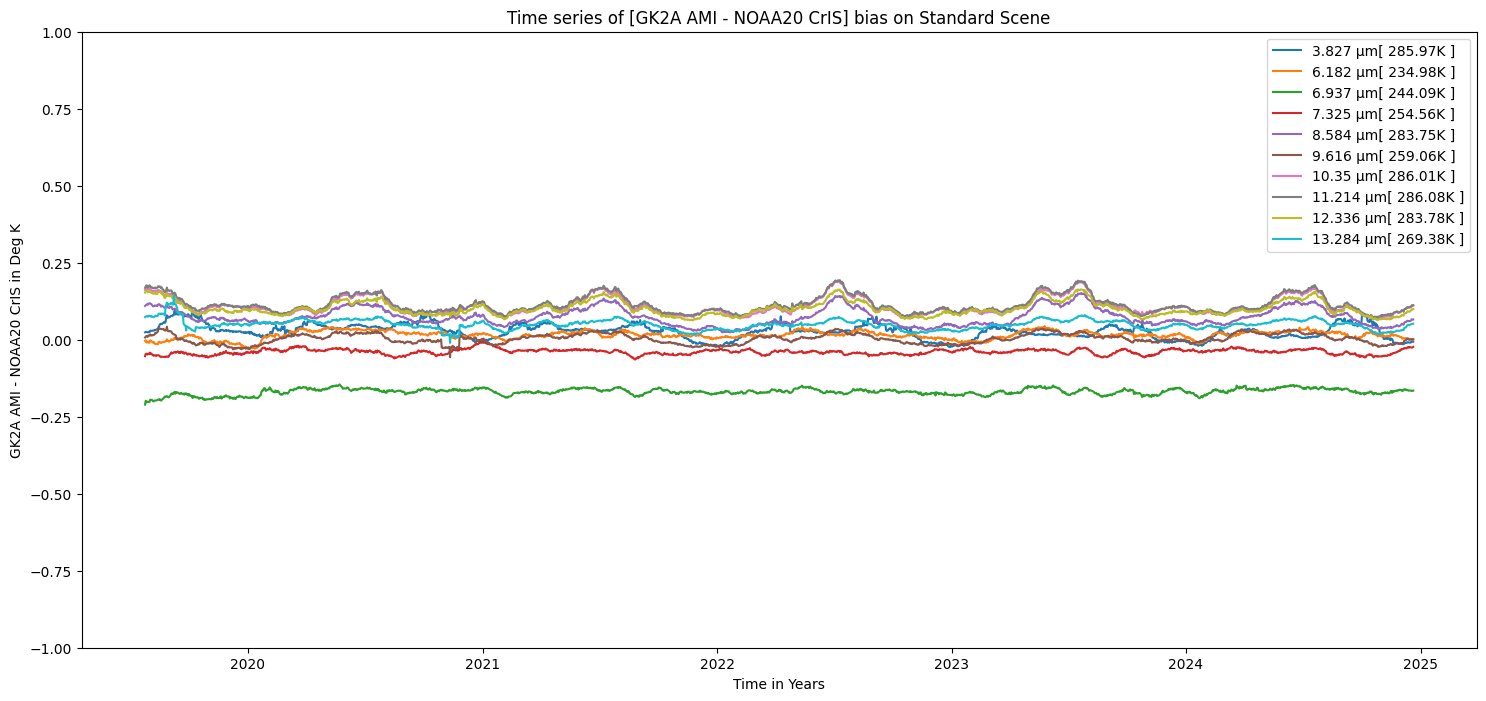

In [ ]:
cf=10000/np.array(freq_array)
cf=np.around(cf,decimals=3)
cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]
cfreq = [ ' '.join(freq) for freq in cfreq ]


cfreq=[ ''.join(cfreq[fr] +"[ " + str(std_scene_tb[0][fr])+ "K ]") for fr in range(len(cfreq))]


#Pull out the column with time information and convert it to date time format
plt.figure(figsize=(18,8))
plt.ylim(-1, 1)
days_since1970=num2pydate(df_reindex.index,'days since 1970-01-01')
plt.plot(days_since1970,df_array)

#print(days_since1970, df_reindex.shape)
#plt.title('Time series of MSG2 SEVIRI IASI Bias (Prime Product)')
plt.title(ttitle)
plt.xlabel('Time in Years')
plt.ylabel(ytitle)
plt.legend(cfreq)
print(cf)
#print(''.join(str(reference_name)) )
print(len(days_since1970))

<ipython-input-12-9cde872ac3f3>:9: RuntimeWarning: overflow encountered in exp
  std_scene_rad=(c1 * wnc*wnc*wnc) / ((np.exp(c2 * wnc/(alpha * std_scene_tb + beta))) - 1.)


10 1976
19760 10


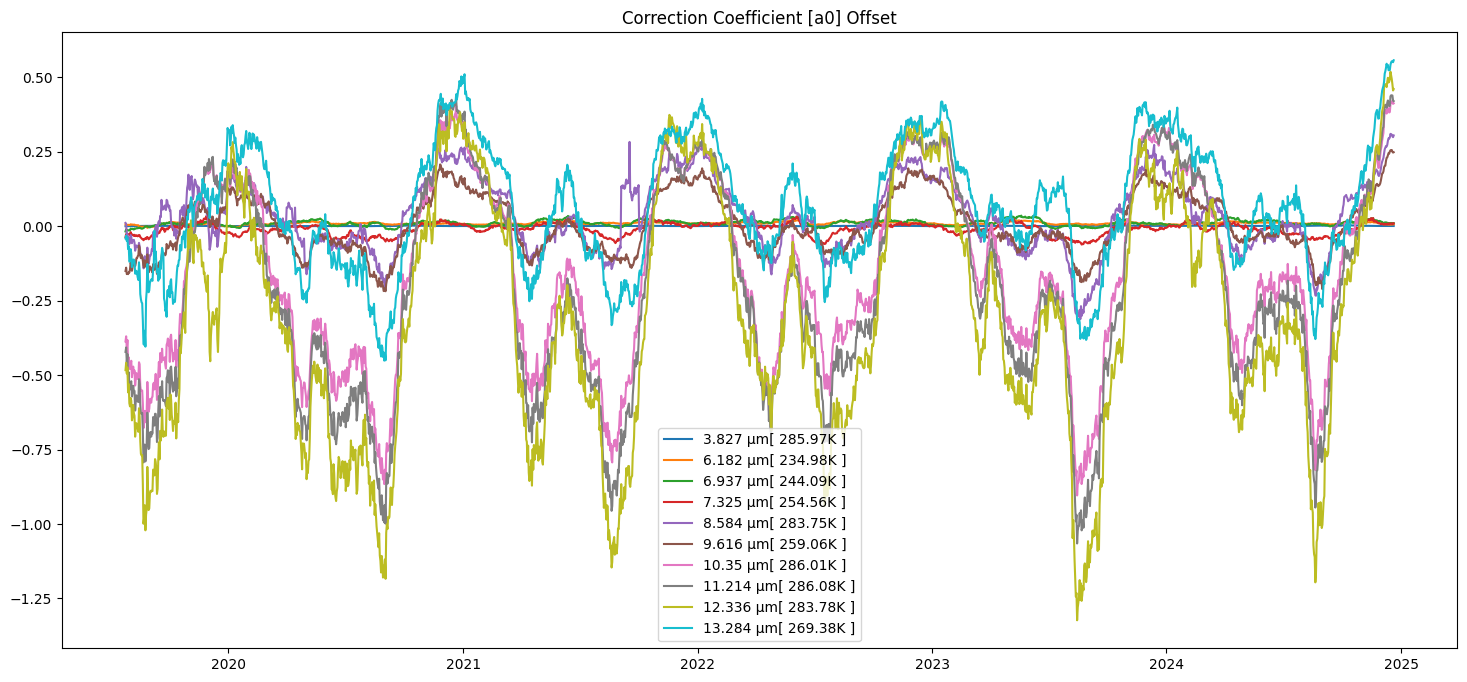

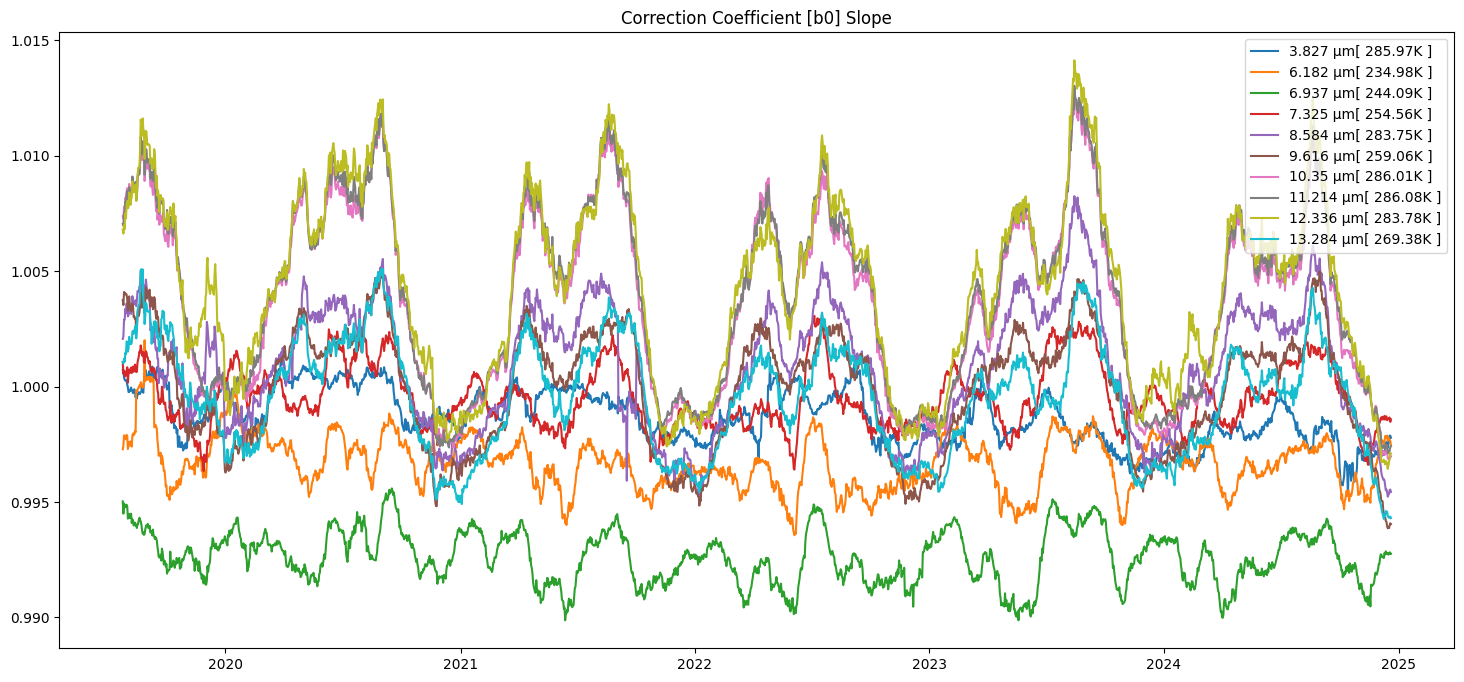

In [ ]:
import math
c1 = 1.19104e-05
c2 = 1.43877
alpha=np.array(alpha)
beta=np.array(beta)
nchans=np.size(alpha)
wnc=np.array(freq_array.copy())
N=(c1 * wnc*wnc*wnc)
std_scene_rad=(c1 * wnc*wnc*wnc) / ((np.exp(c2 * wnc/(alpha * std_scene_tb + beta))) - 1.)
print (nchans,len(days_since1970) )

rad_bias_array=np.zeros((nchans,len(days_since1970)),dtype='f')
ref_bt=np.zeros((nchans,len(days_since1970)),dtype='f')
ref_rad=np.zeros((nchans,len(days_since1970)),dtype='f')
gsics_corr_rad=np.zeros((nchans,len(days_since1970)),dtype='f')

gsics_corr_bt=np.zeros((nchans,len(days_since1970)),dtype='f')
bt_bias_array=np.zeros((nchans,len(days_since1970)),dtype='f')
print(ref_bt.size, nchans)
plt.figure(figsize=(18,8))
#plt.plot(days_since1970,df_array_br)
plt.title("Correction Coefficient [a0] Offset")
plt.plot(days_since1970,df_array_ar)
plt.legend(cfreq)
plt.figure(figsize=(18,8))
plt.title("Correction Coefficient [b0] Slope")
plt.plot(days_since1970,df_array_br)
plt.legend(cfreq)

In [ ]:
radiance=np.zeros((nchans),dtype='f')
for n in range(len(days_since1970)-2):
#  print(n,nchans, len(days_since1970),len(std_scene_tb), df_array.shape,ref_bt.shape )
  ref_bt[:,n]= std_scene_tb[0] - df_array[ n,: ]
  tempp=ref_bt[:,n].copy()
  ref_rad[:,n]= (c1 * wnc*wnc*wnc) / ((np.exp(c2 * wnc/(alpha * tempp + beta))) - 1.)

  gsics_corr_rad[:,n]= std_scene_rad[0]/br[n,:]-cr[n,: ]
  radiance[:]=  gsics_corr_rad[:,n].copy()

  gsics_corr_bt[:,n]=   ((c2 * wnc)/np.log(1.+(c1 * wnc*wnc*wnc)/radiance)-beta)/alpha

  bt_bias_array[:,n]=gsics_corr_bt[:,n] -  ref_bt[:,n]
#  bt_bias_array[:,n]=gsics_corr_bt[:,n] -  std_scene_tb[:]




In [ ]:
radiance.shape,gsics_corr_rad.shape

((10,), (10, 1976))

In [ ]:
wnc.shape,alpha.shape,tempp.shape,std_scene_tb.shape

((10,), (10,), (10,), (1976, 10))

(10, 1976)
[real_datetime(2019, 7, 25, 0, 0) real_datetime(2019, 7, 26, 0, 0)
 real_datetime(2019, 7, 27, 0, 0) ... real_datetime(2024, 12, 18, 0, 0)
 real_datetime(2024, 12, 19, 0, 0) real_datetime(2024, 12, 20, 0, 0)] (1976, 10)


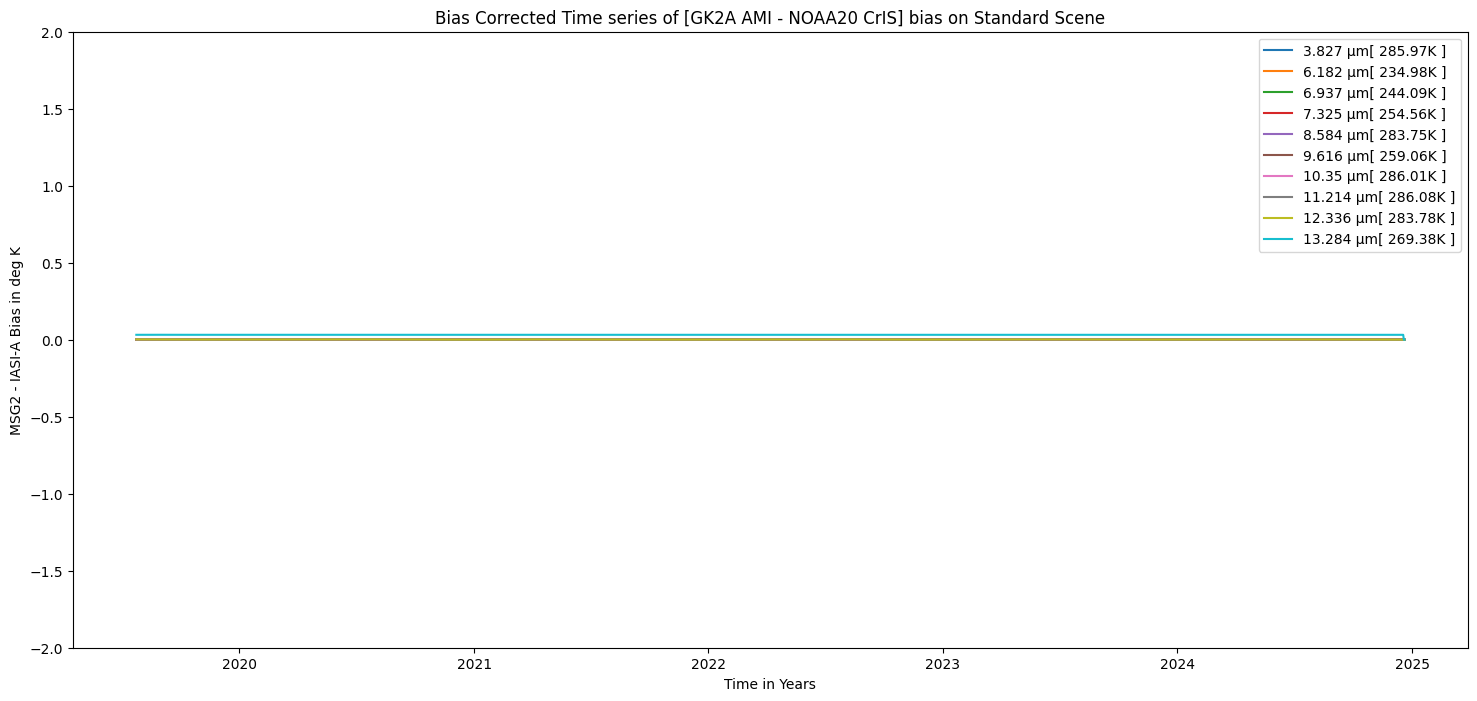

In [ ]:
print(bt_bias_array.shape)
plt.figure(figsize=(18,8))
plt.ylim(-2, 2)
plt.plot(days_since1970, np.transpose(bt_bias_array))

print(days_since1970, df_reindex.shape)
#plt.title('Bias Corrected Time series of MSG2 SEVIRI IASI Bias (Prime Product)')
plt.title("Bias Corrected "+ttitle)
plt.xlabel('Time in Years')
plt.ylabel('MSG2 - IASI-A Bias in deg K')
plt.legend(cfreq)

In [ ]:
#Construct a data frame with observation days in the first column
#However this has missing days and at time repeated days.
dtime_days=pd.DataFrame(time_array.astype(int),columns=list('t'))
std_df = pd.DataFrame(std_bias)
std_df.columns.name = 'standard_scene_bias'

#print(ar.shape,br.shape,time_array.shape)

ar_df=pd.DataFrame(ar0)
ar_df.columns.name = 'offset'

br_df=pd.DataFrame(br0)
br_df.columns.name = 'bias'

std_df.columns=freq_array
df_time_std_bias=[dtime_days,std_df]
df_time_ar=[dtime_days,ar_df]
df_time_br=[dtime_days,br_df]

#df_time_std_bias=[dtime_days,std_df,ar_df,br_df]
df_time_bias=pd.concat(df_time_std_bias,axis=1) # Data Frame with time information added in column
df_time_ar=pd.concat(df_time_ar,axis=1) # Data Frame with time information added in column
df_time_br=pd.concat(df_time_br,axis=1) # Data Frame with time information added in column

#Construct a data time series such that days are evenly placed
#However this has missing days. Fill Nan on these days. Also drop duplicate days if any

print(time_array[0].astype(int),time_array[-1].astype(int))
new_index = pd.Index(np.arange(time_array[0].astype(int),time_array[-1].astype(int)), name="t")
temp=df_time_bias.drop_duplicates(subset=['t'])
ar_temp=df_time_ar.drop_duplicates(subset=['t'])
br_temp=df_time_br.drop_duplicates(subset=['t'])


df_reindex=temp.set_index("t").reindex(new_index)
df_array=df_reindex.to_numpy()

df_reindex_ar=ar_temp.set_index("t").reindex(new_index)
df_array_ar=df_reindex_ar.to_numpy()

df_reindex_br=br_temp.set_index("t").reindex(new_index)
df_array_br=df_reindex_br.to_numpy()

ar=df_array_ar.copy()
br=df_array_br.copy()
cr=df_array_ar/df_array_br


18102 20077
